In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from gempy.core.data import Grid

In [4]:
grid = Grid()

In [5]:
grid.set_regular_grid([0,100,0,100,-100,0], [20,20,20])

In [6]:
grid.values

array([[  2.5,   2.5, -97.5],
       [  2.5,   2.5, -92.5],
       [  2.5,   2.5, -87.5],
       ...,
       [ 97.5,  97.5, -12.5],
       [ 97.5,  97.5,  -7.5],
       [ 97.5,  97.5,  -2.5]])

In [7]:
grid.grid_active

array([ True, False, False, False])

In [8]:
grid.length

array([   0, 8000, 8000, 8000, 8000])

Now we set topography

showing...


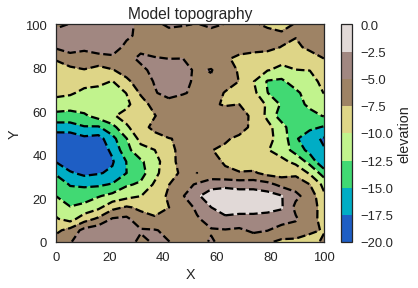

In [9]:
grid.set_topography()

In [10]:
grid.length[np.where(grid.grid_types == 'regular')[0]]

array([0])

In [11]:
grid.length

array([   0, 8000, 8000, 8400, 8400])